In [23]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey.db')
df = pd.read_sql('SELECT * FROM survey_data', conn)

Text(0, 0.5, 'Average Job Satisfaction')

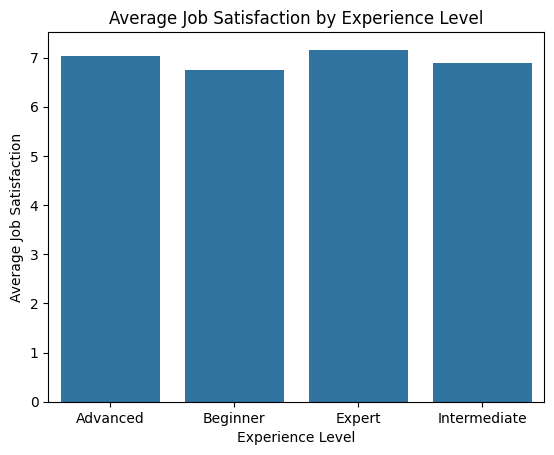

In [24]:
job_sat_median = df.groupby(df["ExperienceLevelCoding"])["JobSat"].mean().reset_index()

sns.barplot(x=job_sat_median["ExperienceLevelCoding"], y=job_sat_median["JobSat"])
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')

Text(0, 0.5, 'Count')

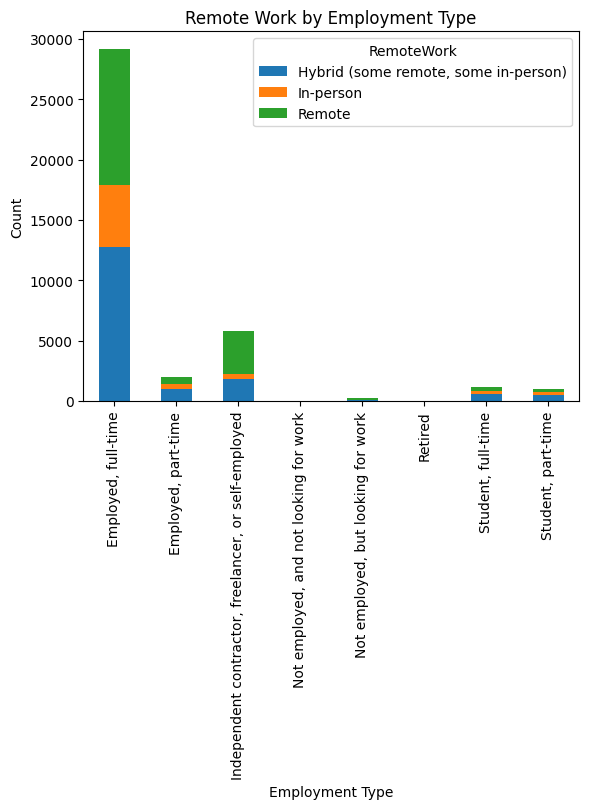

In [25]:
df_copy = df.copy()

df_copy["Employment"] = df["Employment"].str.split(";")
df_copy = df_copy.explode("Employment")
df_copy["Employment"] = df_copy["Employment"].str.strip()
employment_remote_cross_table = pd.crosstab(df_copy['Employment'], df_copy['RemoteWork'])
employment_remote_cross_table.plot(kind='bar', stacked=True,ax=plt.gca())
plt.title('Remote Work by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')

Text(0, 0.5, 'Industry')

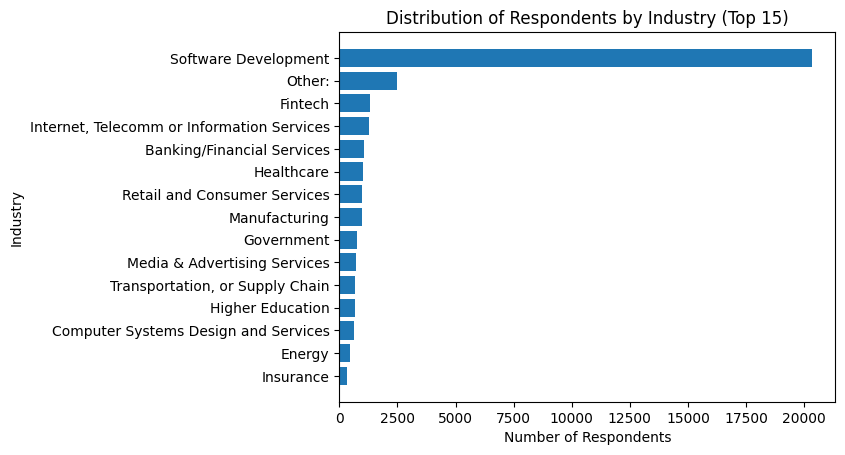

In [26]:
respondent_industries = df.groupby("Industry")["ResponseId"].count()
respondent_industries = respondent_industries.sort_values(ascending=True)

plt.barh(y=respondent_industries.index, width=respondent_industries.values)
plt.title('Distribution of Respondents by Industry (Top 15)')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')

<Axes: xlabel='Age_transformed', ylabel='WorkExp'>

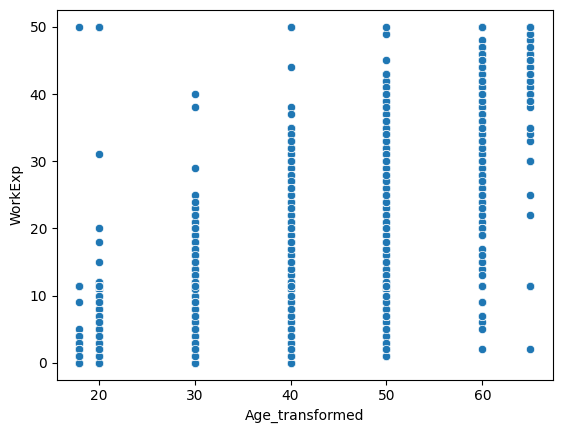

In [27]:
QUERY = """SELECT Age_transformed, WorkExp FROM survey_data WHERE Age_transformed IS NOT NULL AND WorkExp IS NOT NULL"""

df = pd.read_sql_query(QUERY, conn)
sns.scatterplot(x=df["Age_transformed"], y=df["WorkExp"])

([0, 1, 2, 3, 4],
 [Text(0, 0, '30-60 minutes a day'),
  Text(1, 0, 'Less than 15 minutes a day'),
  Text(2, 0, '60-120 minutes a day'),
  Text(3, 0, '15-30 minutes a day'),
  Text(4, 0, 'Over 120 minutes a day')])

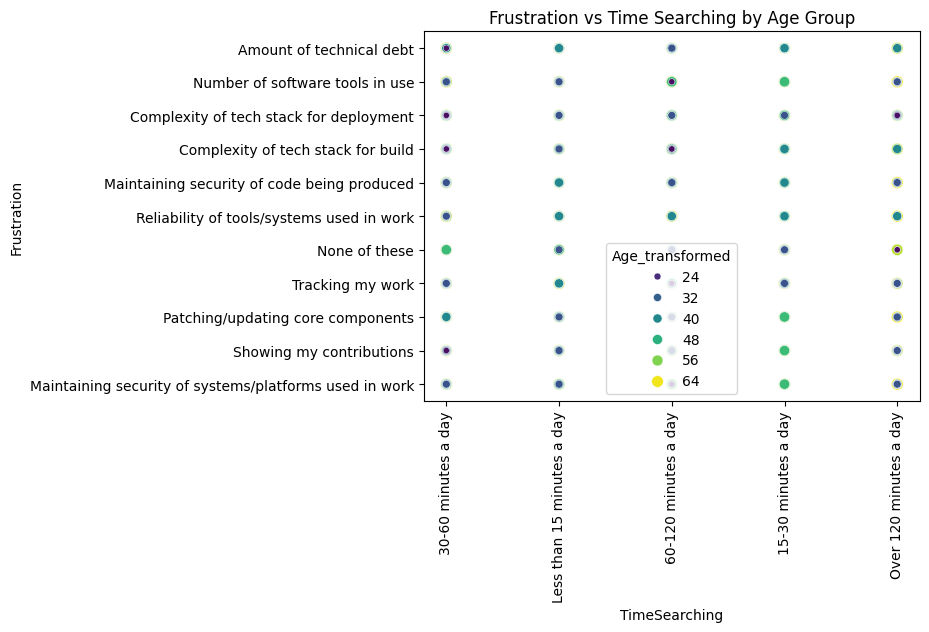

In [28]:
QUERY = """
SELECT TimeSearching, Frustration, Age_transformed
FROM survey_data
WHERE TimeSearching IS NOT NULL
  AND Frustration IS NOT NULL
  AND WorkExp IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

Frustration_type = df["Frustration"].str.split(";").explode().str.strip()

sns.scatterplot(x=df["TimeSearching"], y=Frustration_type,size=df["Age_transformed"],hue=df["Age_transformed"], palette="viridis")
plt.title("Frustration vs Time Searching by Age Group")
plt.xticks(rotation=90)

                    TimeSearchingTransformed  TimeAnsweringTransformed
Age                                                                   
18-24 years old                    52.469189                 27.940541
25-34 years old                    48.752051                 33.306049
35-44 years old                    46.252274                 36.056673
45-54 years old                    44.474059                 34.337942
55-64 years old                    44.348081                 32.231793
65 years or older                  44.387755                 30.000000
Under 18 years old                 46.432584                 23.174157


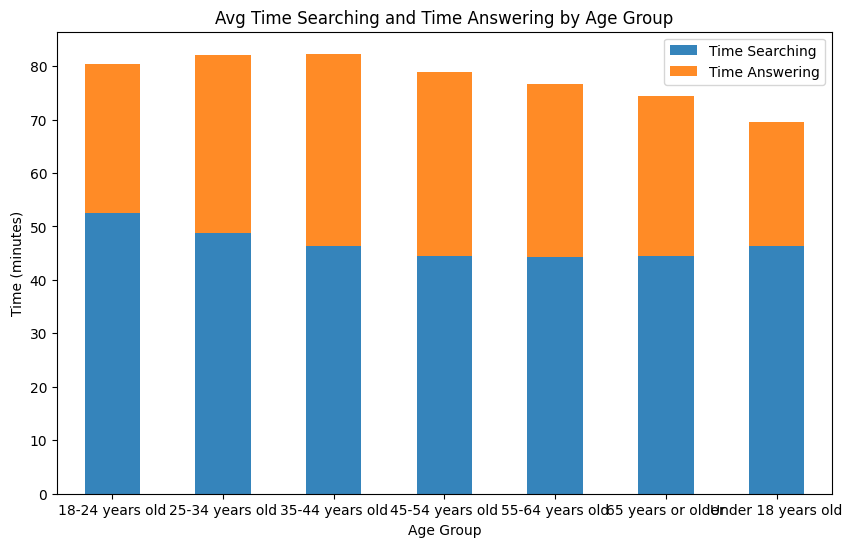

In [29]:
QUERY = """
SELECT TimeSearchingTransformed , TimeAnsweringTransformed , Age FROM survey_data
WHERE TimeSearching IS NOT NULL 
    AND TimeAnswering IS NOT NULL 
"""
df = pd.read_sql_query(QUERY, conn)

grouped_data = df.groupby("Age").mean()
print(grouped_data)
grouped_data.plot(kind='bar', figsize=(10, 6), stacked=True,alpha=0.9)
plt.title('Avg Time Searching and Time Answering by Age Group')
plt.xticks(rotation=0)
plt.ylabel('Time (minutes)')
plt.xlabel('Age Group')
plt.legend( labels=['Time Searching', 'Time Answering'])

Text(0.5, 1.0, 'Mean Years of Professional Coding by Age')

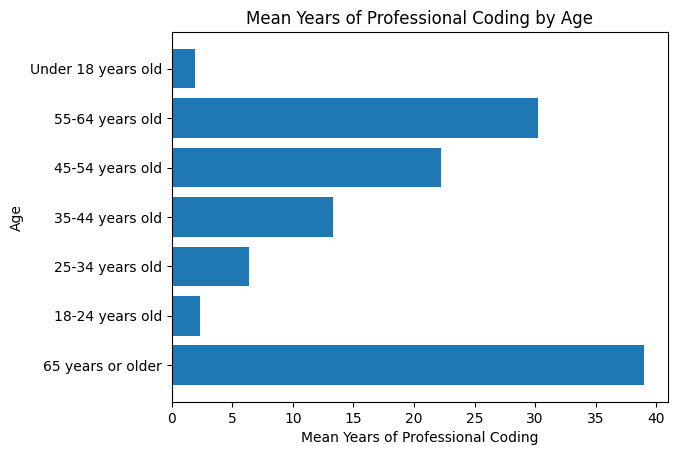

In [30]:
QUERY = """SELECT AVG(YearsCodePro) as YearsCodeProMean, Age FROM survey_data 
WHERE YearsCodePro IS NOT NULL 
AND Age IS NOT NULL 
GROUP BY Age 
ORDER BY 
    CASE Age
        WHEN 'Under 18 years' THEN 1
        WHEN '18-24 years' THEN 2
        WHEN '25-34 years' THEN 3
        WHEN '35-44 years' THEN 4
        WHEN '45-54 years' THEN 5
        WHEN '55-64 years' THEN 6
        WHEN '65 years or older' THEN 7
        ELSE 8
    END"""
df = pd.read_sql_query(QUERY, conn)

plt.barh(y = df["Age"], width = df["YearsCodeProMean"])
plt.xlabel("Mean Years of Professional Coding")
plt.ylabel("Age")
plt.title("Mean Years of Professional Coding by Age")


Text(0, 0.5, 'Count')

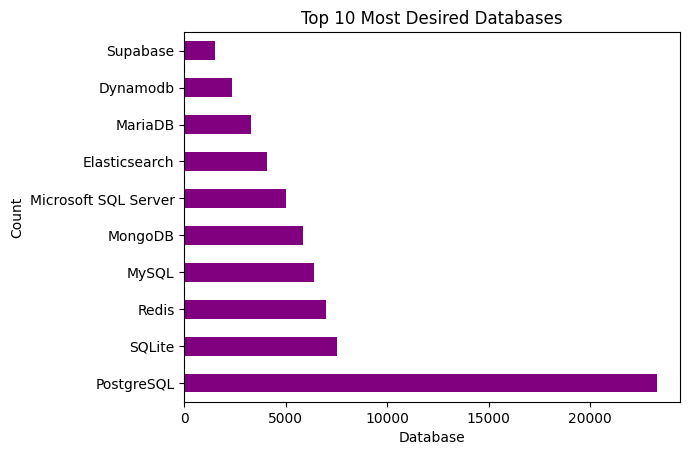

In [31]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM survey_data 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

Databases = df["DatabaseWantToWorkWith"].str.split(";").explode().str.slice()

Databases = Databases.value_counts(ascending=False).head(10)

Databases.plot(kind="barh", color="Purple")
plt.title('Top 10 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Count')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bash/Shell (all shells)'),
  Text(1, 0, 'C#'),
  Text(2, 0, 'C++'),
  Text(3, 0, 'HTML/CSS'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'JavaScript'),
  Text(6, 0, 'PHP'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'SQL'),
  Text(9, 0, 'TypeScript')])

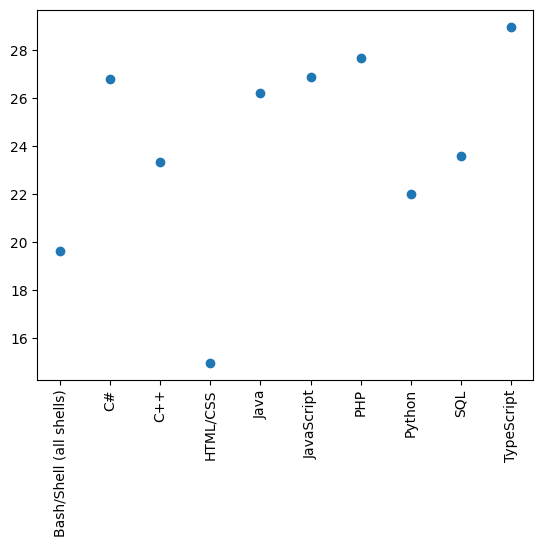

In [32]:
df = pd.read_sql('SELECT * FROM survey_data', conn)

top_language = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip().value_counts().head(10).index

language_df = df.assign(language_worked_with = df["LanguageHaveWorkedWith"].str.split(";").explode("LanguageHaveWorkedWith"))

language_df = language_df[language_df["LanguageHaveWorkedWith"].isin(top_language)]

language_job = language_df.groupby("LanguageHaveWorkedWith")["JobSatPoints_6"].mean()

plt.scatter(x =language_job.index, y = language_job.values )
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

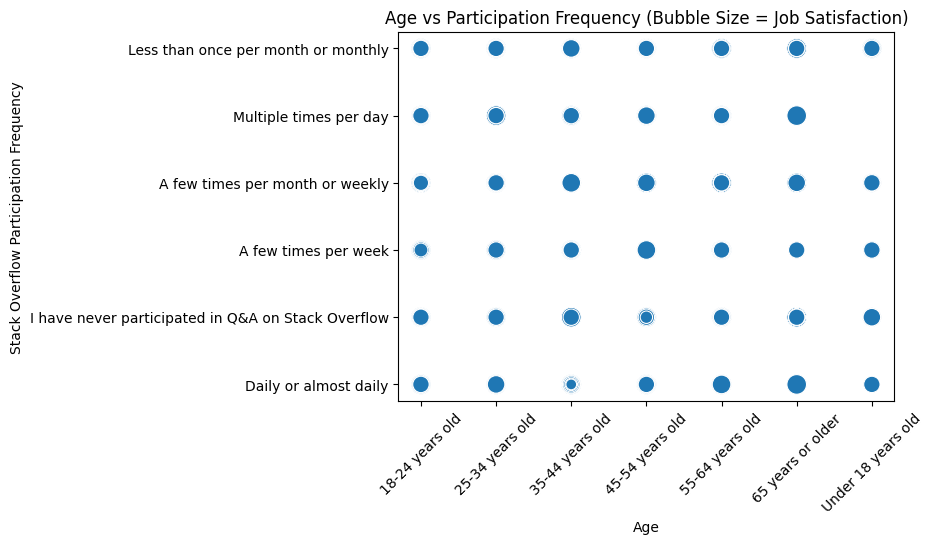

In [33]:
sns.scatterplot(x= df["Age"],y=df["SOPartFreq"],s=df["JobSat"]*20)
plt.title("Age vs Participation Frequency (Bubble Size = Job Satisfaction)")
plt.xlabel("Age")
plt.ylabel("Stack Overflow Participation Frequency")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

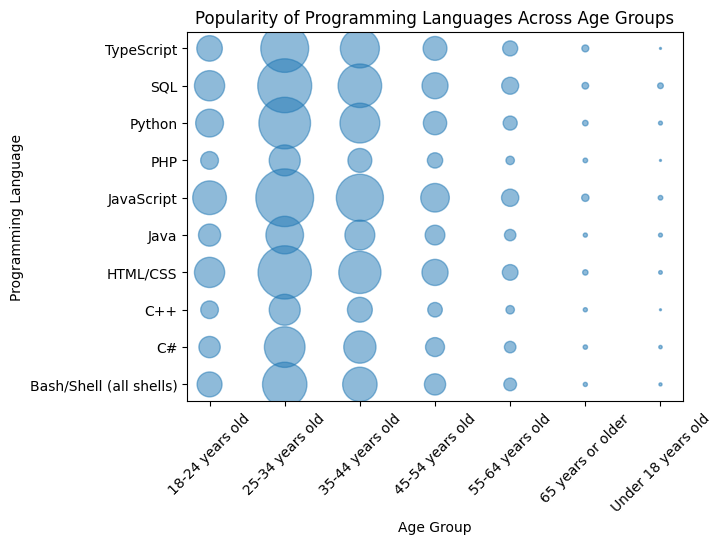

In [34]:
language = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(language_workedc_with = df["LanguageHaveWorkedWith"].str.split(";").explode("LanguageHaveWorkedWith"))
df_clean = df_clean[df_clean["language_workedc_with"].isin(language)]

df_clean = df_clean.groupby(["Age","language_workedc_with"])["language_workedc_with"].size().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["Age"],
    y=df_clean["language_workedc_with"],
    s=df_clean["Frequency"],
    alpha=0.5
)
plt.title("Popularity of Programming Languages Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Programming Language")
plt.xticks(rotation=45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

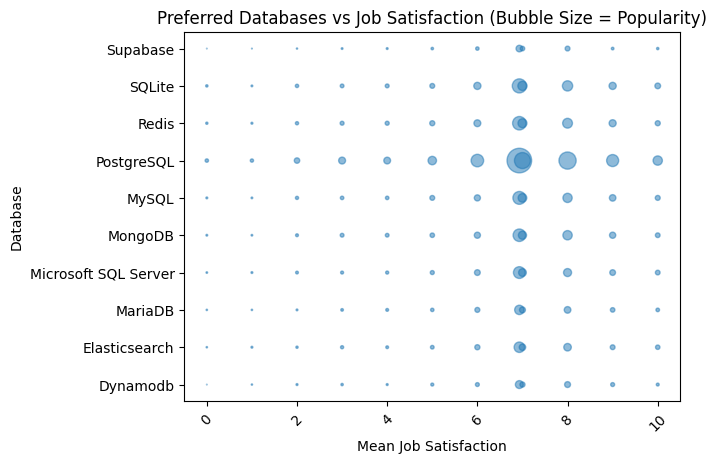

In [35]:
language = df["DatabaseWantToWorkWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Database_Want_To_Work_With = df["DatabaseWantToWorkWith"].str.split(";").explode("DatabaseWantToWorkWith"))
df_clean = df_clean[df_clean["Database_Want_To_Work_With"].isin(language)]

df_clean = df_clean.groupby(["JobSat","Database_Want_To_Work_With"])["Database_Want_To_Work_With"].size().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["JobSat"],
    y=df_clean["Database_Want_To_Work_With"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Preferred Databases vs Job Satisfaction (Bubble Size = Popularity)')
plt.xlabel('Mean Job Satisfaction')
plt.ylabel('Database')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

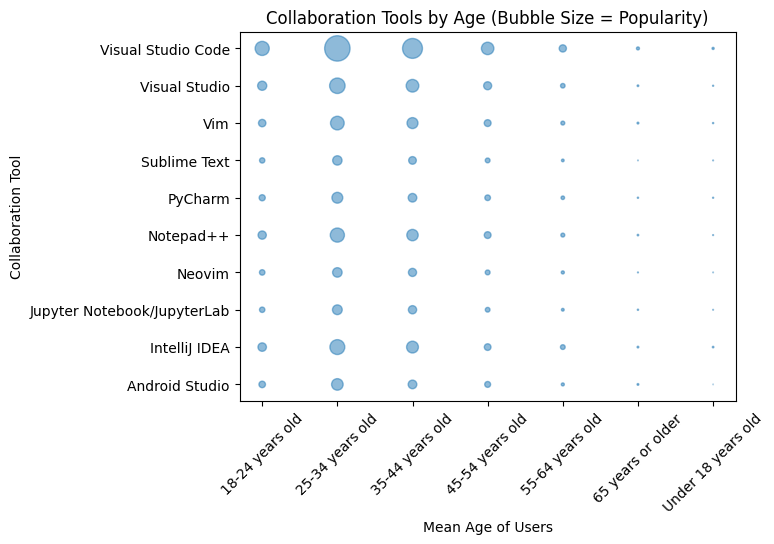

In [36]:
language = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Collab_Tool_wroked_with = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode("NEWCollabToolsHaveWorkedWith"))
df_clean = df_clean[df_clean["Collab_Tool_wroked_with"].isin(language)]

df_clean = df_clean.groupby(["Age","Collab_Tool_wroked_with"])["Collab_Tool_wroked_with"].count().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["Age"],
    y=df_clean["Collab_Tool_wroked_with"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Collaboration Tools by Age (Bubble Size = Popularity)')
plt.xlabel('Mean Age of Users')
plt.ylabel('Collaboration Tool')
plt.xticks(rotation=45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

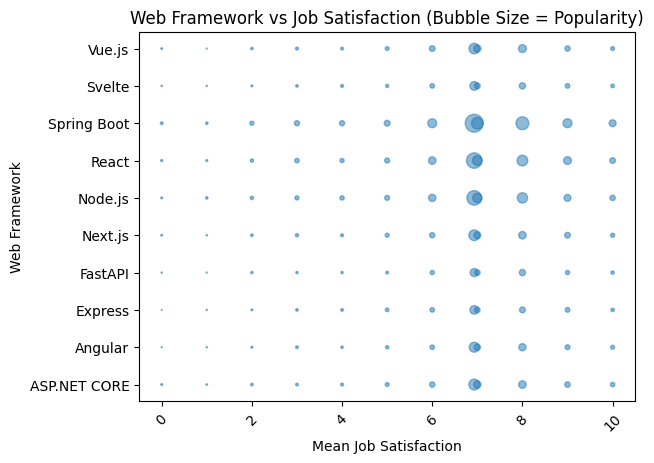

In [37]:
language = df["WebframeWantToWorkWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Web_Frame_Want_To_Work_With = df["WebframeWantToWorkWith"].str.split(";").explode("WebframeWantToWorkWith"))
df_clean = df_clean[df_clean["Web_Frame_Want_To_Work_With"].isin(language)]

df_clean = df_clean.groupby(["JobSat","Web_Frame_Want_To_Work_With"])["Web_Frame_Want_To_Work_With"].count().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["JobSat"],
    y=df_clean["Web_Frame_Want_To_Work_With"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Web Framework vs Job Satisfaction (Bubble Size = Popularity)')
plt.xlabel('Mean Job Satisfaction')
plt.ylabel('Web Framework')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 5 Developer Roles')

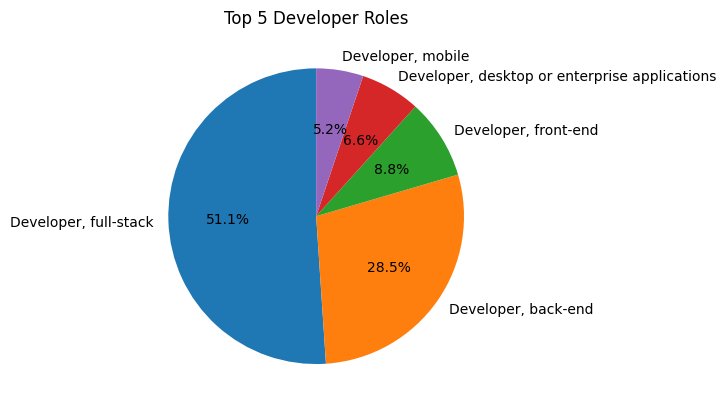

In [38]:
dev_types =df["DevType"].str.split(";").explode().str.strip()
dev_types = dev_types.value_counts().head(5)
plt.pie(dev_types, labels=dev_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Developer Roles')

<Axes: xlabel='Age'>

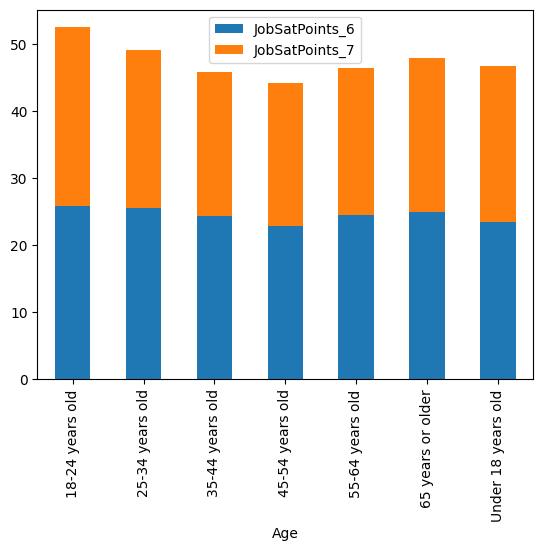

In [39]:
job_sat_df = df[["JobSatPoints_6","JobSatPoints_7","Age"]]
job_sat_df = job_sat_df.groupby("Age")[["JobSatPoints_6","JobSatPoints_7"]].mean()

job_sat_df.plot(kind="bar",stacked=True)

Text(0.5, 0, 'Database')

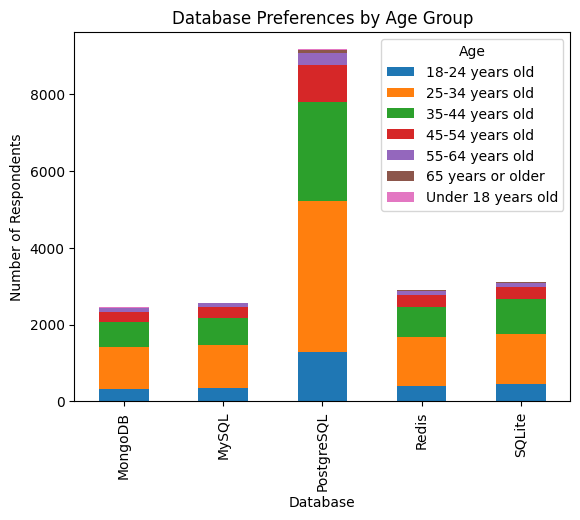

In [40]:
df_clean = df[["DatabaseWantToWorkWith","Age"]]
top_employment = df_clean["DatabaseWantToWorkWith"].str.split(";").explode().str.strip().value_counts().head(5).index

employment_df = df_clean.assign(database_type = df_clean["DatabaseWantToWorkWith"].str.split(";").explode("DatabaseWantToWorkWith"))
employment_df = employment_df[employment_df["database_type"].isin(top_employment)]

employment_df = employment_df.groupby(["database_type","Age"]).size().unstack()
employment_df.plot(kind="bar",stacked=True)
plt.title("Database Preferences by Age Group")
plt.ylabel("Number of Respondents")
plt.xlabel("Database")

Text(0, 0.5, 'Average Job Satisfaction Score')

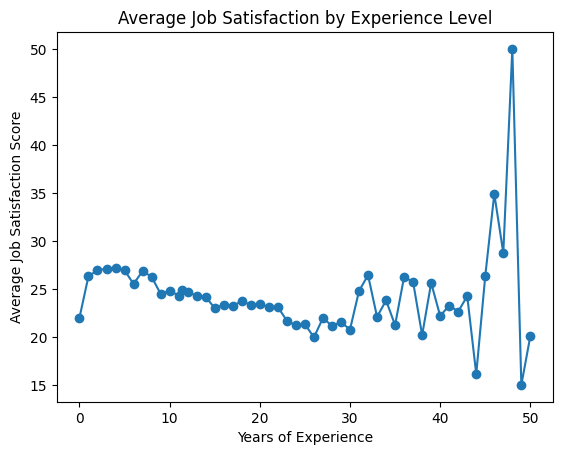

In [41]:
exp_satisfaction = df.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

plt.plot(exp_satisfaction['WorkExp'], exp_satisfaction['JobSatPoints_6'], marker='o')
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction Score')


Text(0, 0.5, 'Median Converted Compensation Yearly')

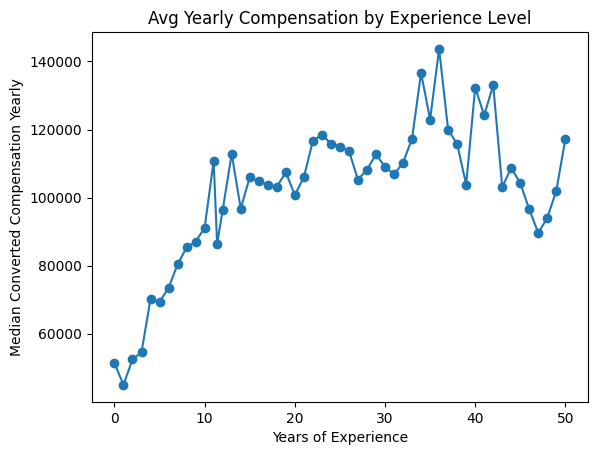

In [42]:
exp_comp  = df.groupby('WorkExp')['ConvertedCompYearly'].mean().reset_index()

plt.plot(exp_comp ['WorkExp'], exp_comp ['ConvertedCompYearly'], marker='o')
plt.title('Avg Yearly Compensation by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Median Converted Compensation Yearly')


Text(0, 0.5, 'Count')

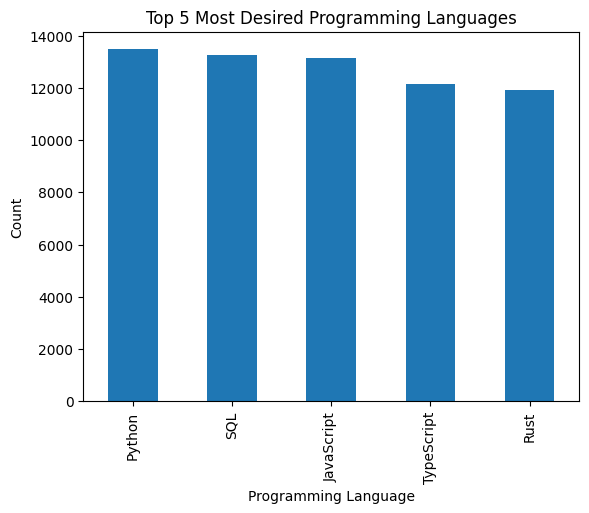

In [43]:
language = df["LanguageWantToWorkWith"].str.split(";").explode().str.strip()
language = language.value_counts().head(5)

language.plot(kind="bar")
plt.title('Top 5 Most Desired Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Count')

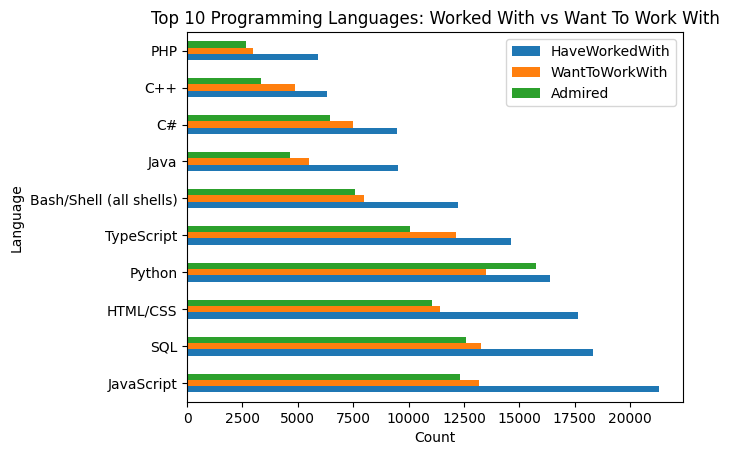

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def process_category(df, col_have, col_want, col_admired, top_n=10, title=""):
    # Split and explode each column
    have = df[col_have].str.split(";").explode().value_counts()
    want = df[col_want].str.split(";").explode().value_counts()
    admired = df[col_admired].str.split(";").explode().value_counts()

    # Merge into one DataFrame
    category_df = pd.DataFrame({
        "HaveWorkedWith": have,
        "WantToWorkWith": want,
        "Admired": admired
    }).fillna(0)

    # Take top N based on 'HaveWorkedWith'
    category_df = category_df.sort_values('HaveWorkedWith', ascending=False).head(top_n)

    # Plot
    category_df.plot(kind='barh')
    plt.title(title)
    plt.xlabel("Count")
    plt.ylabel(col_have.replace("HaveWorkedWith", ""))
    plt.show()

# Example usage for each category
process_category(df,
    "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "LanguageAdmired",
    title="Top 10 Programming Languages: Worked With vs Want To Work With"
)


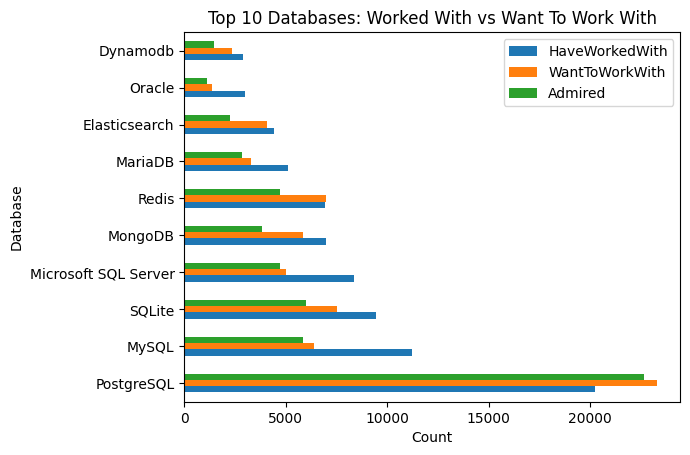

In [47]:
process_category(df,
    "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "DatabaseAdmired",
    title="Top 10 Databases: Worked With vs Want To Work With"
)

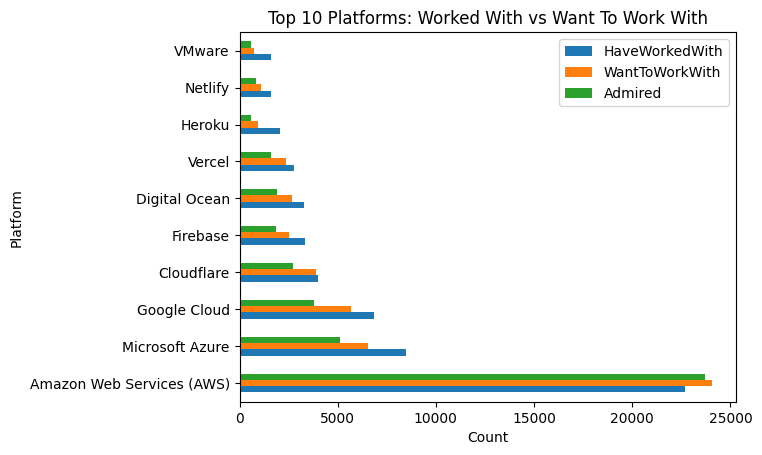

In [48]:
process_category(df,
    "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "PlatformAdmired",
    title="Top 10 Platforms: Worked With vs Want To Work With"
)

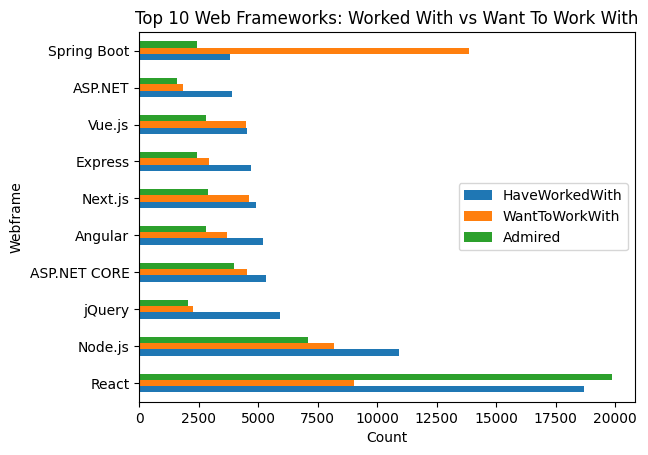

In [49]:
process_category(df,
    "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "WebframeAdmired",
    title="Top 10 Web Frameworks: Worked With vs Want To Work With"
)

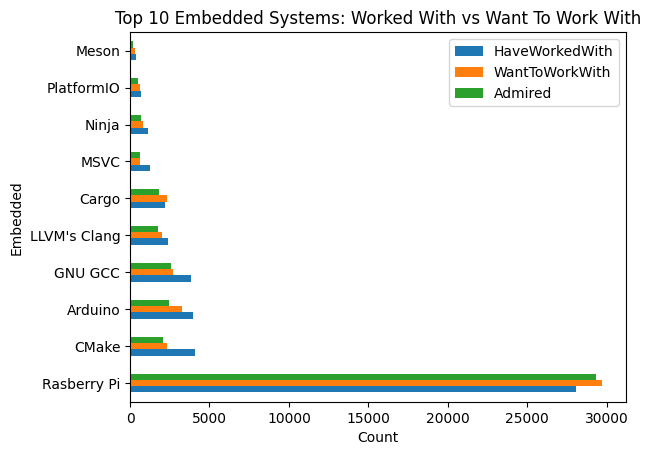

In [50]:
process_category(df,
    "EmbeddedHaveWorkedWith", "EmbeddedWantToWorkWith", "EmbeddedAdmired",
    title="Top 10 Embedded Systems: Worked With vs Want To Work With"
)

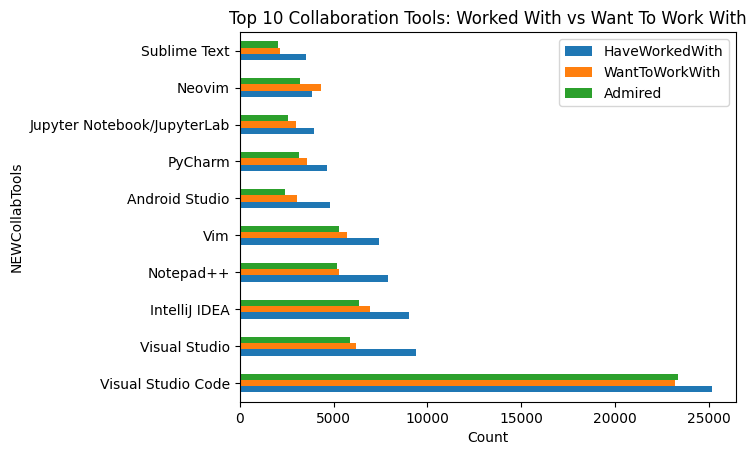

In [51]:
process_category(df,
    "NEWCollabToolsHaveWorkedWith", "NEWCollabToolsWantToWorkWith", "NEWCollabToolsAdmired",
    title="Top 10 Collaboration Tools: Worked With vs Want To Work With"
)

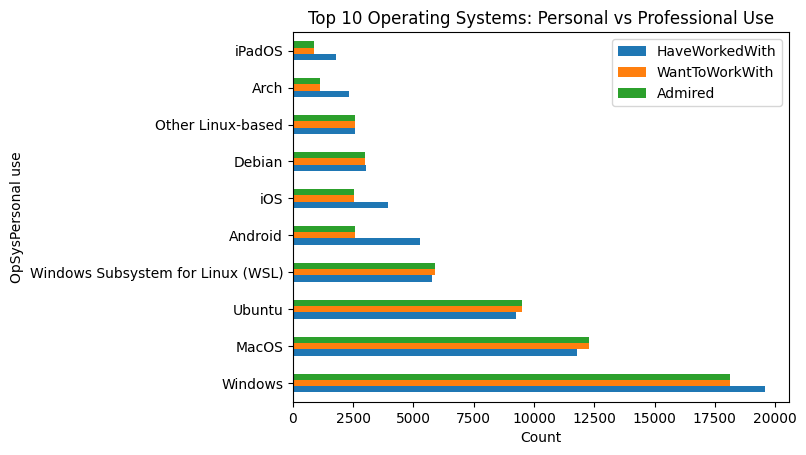

In [52]:
process_category(df,
    "OpSysPersonal use", "OpSysProfessional use", "OpSysProfessional use",  # No Admired col? duplicate
    title="Top 10 Operating Systems: Personal vs Professional Use"
)

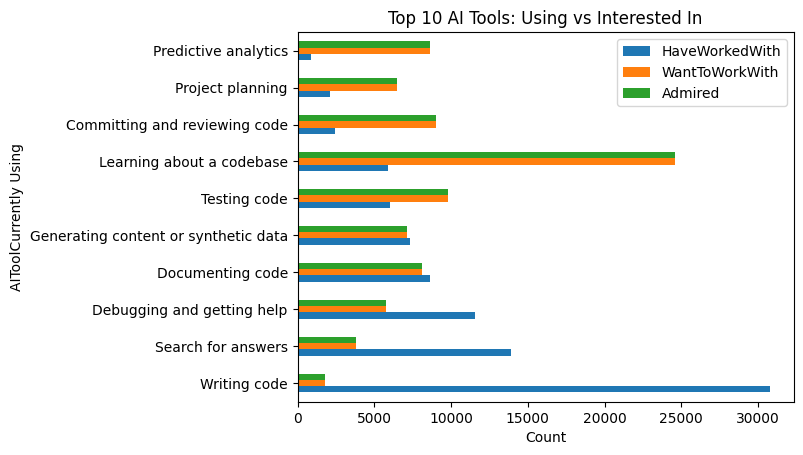

In [53]:

process_category(df,
    "AIToolCurrently Using", "AIToolInterested in Using", "AIToolInterested in Using",  # No Admired col? duplicate
    title="Top 10 AI Tools: Using vs Interested In"
)